In [1]:
#Tester denne dritten 

In [2]:
"""
import pandas - a Python library for woking with datasets. It has functions for analyzing, cleaning, exploring
and manipulating those. 

import numpy - imports a python library called numpy that is used for working with arraya and some other 
mathematical methods

import matplotlib.pyplot - we use this library for creating static, animated and interactive visualizations (plots)

import datetime - using it for working with date and time in different formats 
"""

'\nimport pandas - a Python library for woking with datasets. It has functions for analyzing, cleaning, exploring\nand manipulating those. \n\nimport numpy - imports a python library called numpy that is used for working with arraya and some other \nmathematical methods\n\nimport matplotlib.pyplot - we use this library for creating static, animated and interactive visualizations (plots)\n\nimport datetime - using it for working with date and time in different formats \n'

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
"""
The next three lines of code is to read the tabular data file (csv) or so called database.
df.head() gets us the n rows from the table. An easy way to check the data format. 
"""

'\nThe next three lines of code is to read the tabular data file (csv) or so called database.\ndf.head() gets us the n rows from the table. An easy way to check the data format. \n'

In [9]:
url = "flight.csv"

In [10]:
df = pd.read_csv(url)

In [11]:
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD
3,3,2013-1-1 06:00:00,2013-1-1 05:55:00,2013-1-1 09:13:00,2013-1-1 08:54:00,507,EWR,FLL
4,4,2013-1-1 06:00:00,2013-1-1 05:57:00,2013-1-1 08:38:00,2013-1-1 08:46:00,79,JFK,MCO


In [ ]:
"""
The next block with code converts the data from 4 of the columns in the datatable, to a datetime format. 
This way we get better overview of the flights and we can trace delays. 
"""

In [12]:
df['datetime_val'] = pd.to_datetime(df['datetime_val'], errors='coerce') 
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')
#or use errors='coerce' to put a NaT value (NaT = dummy var for missing value)

In [ ]:
"""
By using the for-loop we iterate each row of the data table and in addition we do it by row index. 
If arrival time is less than departure time (negative) we add to it one date. The timedelta is a method that 
helps us to manipulate datetime variables. The same approach is used in the next line. 
"""

In [13]:
for index, row in df.iterrows():
    #if air_time is negative
    if (row['arr_time']<row['dep_time']):
        df.loc[index, 'arr_time'] = (row['arr_time'])+ datetime.timedelta(days=1)
    if (row['sched_arr_time']<row['dep_time']):
        df.loc[index, 'sched_arr_time'] = (row['sched_arr_time'])+ datetime.timedelta(days=1)
        

In [ ]:
"""
In the next to lines we are calling to new columns: air time and delay. 
These to are calculated by using previous values. 
"""

In [19]:
df['air_time'] = df["arr_time"]-df["dep_time"]
df['delay'] = df["arr_time"]-df["sched_arr_time"]

In [20]:
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00
...,...,...,...,...,...,...,...,...,...,...
121422,123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-10-01 00:30:00,2013-10-01 00:27:00,1371,LGA,FLL,0 days 02:43:00,0 days 00:03:00
121423,123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS,0 days 00:56:00,-1 days +23:37:00
121424,123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-10-01 01:12:00,2013-10-01 00:30:00,471,EWR,SFO,0 days 02:39:00,0 days 00:42:00
121425,123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-10-01 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO,0 days 02:24:00,0 days 02:10:00


In [21]:
"""
In the next block we do similar as one of the above. We have a for-loop cheking the rows by indexing. 
If the air time is a negative value we subtract it from 24hours by using the timedelta function. 
"""

'\nIn the next block we do similar as one of the above. We have a for-loop cheking the rows by indexing. \nIf the air time is a negative value we subtract it from 24hours by using the timedelta function. \n'

In [22]:
#For every row in df
for index, row in df.iterrows():
    #if air_time is negative
    if (row['air_time'].days < 0):
        #Find the row with df.loc                      Take 24 hrs, - air_time + negative days (could be replaced with 1)
        #df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'])

In [23]:
df.to_csv("t2s.csv")

In [24]:
"""
In the next 6 blocks with code we get the air time and the delay. 
Then the delay in percentage of delay is calculated and printed in the table. At last the percentage is 
described statistically by total delay, median, min, max and so on.
"""

'\nIn the next 6 blocks with code we get the air time and the delay. \nThen the delay in percentage of delay is calculated and printed in the table. At last the percentage is \ndescribed statistically by total delay, median, min, max and so on.\n'

In [25]:
airt = df.loc[1, 'air_time']
dela = df.loc[1, 'delay']
print(airt, dela)

0 days 02:18:00 -1 days +23:35:00


In [26]:
(100*dela)/airt

-18.115942028985508

In [27]:
df["percent_delay"] = (100 * df['delay'])/df['air_time']

In [28]:
df.head()

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,air_time,delay,percent_delay
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00,14.932127
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,-1 days +23:35:00,-18.115942
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00,11.320755
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00,9.595960
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,-1 days +23:52:00,-4.968944


In [29]:
df["percent_delay"]

0         14.932127
1        -18.115942
2         11.320755
3          9.595960
4         -4.968944
            ...    
121422     1.840491
121423   -41.071429
121424    26.415094
121425    90.277778
121426     1.923077
Name: percent_delay, Length: 121427, dtype: float64

In [30]:
df["percent_delay"].describe()

count    121373.000000
mean        -29.735566
std         206.591444
min       -2919.565217
25%         -14.838710
50%          -4.864865
75%           6.172840
max         100.000000
Name: percent_delay, dtype: float64

<Axes: >

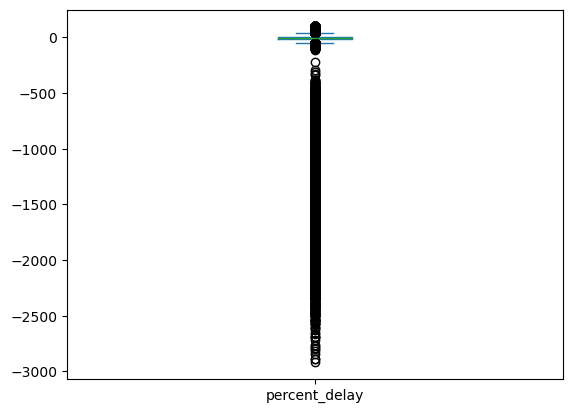

In [31]:
df["percent_delay"].plot.box()

In [40]:
minrow= df['percent_delay'].argmin()

In [33]:
df.iloc[minrow]

Unnamed: 0                      60788
datetime_val      2013-04-01 20:40:00
dep_time          2013-04-01 22:45:00
arr_time          2013-04-01 23:31:00
sched_arr_time    2013-04-02 21:54:00
flight                           1178
origin                            EWR
dest                              BOS
air_time              0 days 00:46:00
delay               -1 days +01:37:00
percent_delay            -2919.565217
Name: 59583, dtype: object

In [ ]:
""" 
The box plot above the two lines of code show that there are some big outliners, with the two lines of code above we
can analyze the row with the minimum value and conclude that there is probably an error in the dataset.
The two code blocks are defining a function to remove the outliners and then using that function to get a clean dataset.
The remaining code blocks are just plotting and showing data, and we can see that the dataset looks cleaner now.
"""

In [34]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df


In [35]:
df["percent_delay"] = remove_outlier(df["percent_delay"])

In [36]:
df["percent_delay"].describe()

count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64

<Axes: >

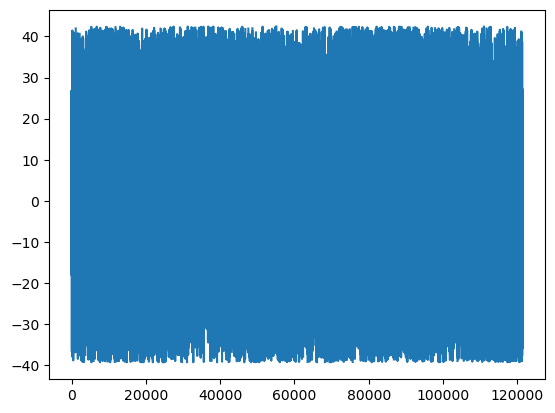

In [37]:
df["percent_delay"].plot.line()

<Axes: >

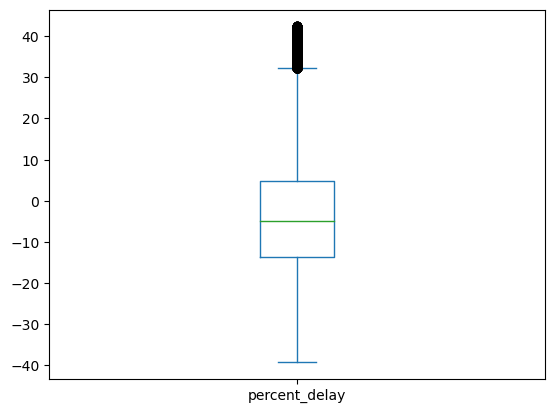

In [38]:
df["percent_delay"].plot.box()

In [39]:
df["percent_delay"].describe()

count    109235.000000
mean         -3.763476
std          15.290651
min         -39.333333
25%         -13.636364
50%          -4.864865
75%           4.694836
max          42.424242
Name: percent_delay, dtype: float64